In [205]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
from astropy.table import Table
import os

from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
# import TheCannon
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

In [2]:
file = 'data_files/Bonus_list.txt'
with open(file) as f:
    content = [line for line in f]     

In [17]:
teff = ascii.read(file)['Teff']
fe_h = ascii.read(file)['[Fe/H]']
ra = ascii.read(file)['Ra']
dec = ascii.read(file)['Dec']

In [18]:
dic = {'RA':ra, 'DEC':dec, 'TEFF':teff, 'FE_H':fe_h}
df = pd.DataFrame(data=dic)
df.to_csv('train_ref/mann_bonus_ref.csv')

In [35]:
list(xmatch.keys())

['col1',
 'DEC_1',
 'FE_H_1',
 'RA_1',
 'TEFF_1',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'APOGEE_ID',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA_2',
 'DEC_2',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'TARGFLAGS',
 'SURVEY',
 'NINST',
 'NVISITS',
 'COMBTYPE',
 'COMMISS',
 'SNR',
 'STARFLAG',
 'STARFLAGS',
 'ANDFLAG',
 'ANDFLAGS',
 'VHELIO_AVG',
 'VSCATTER',
 'VERR',
 'VERR_MED',
 'OBSVHELIO_AVG',
 'OBSVSCATTER',
 'OBSVERR',
 'OBSVERR_MED',
 'SYNTHVHELIO_AVG',
 'SYNTHVSCATTER',
 'SYNTHVERR',
 'SYNTHVERR_MED',
 'RV_TEFF',
 'RV_LOGG',
 'RV_FEH',
 'RV_ALPHA',
 'RV_CARB',
 'RV_CCFWHM',
 'RV_AUTOFWHM',
 'SYNTHSCATTER',
 'STABLERV_CHI2',
 'STABLERV_RCHI2',
 'CHI2_THRESHOLD',
 'STABLERV_CHI2_PROB',
 'APOGEE2_TARGET1',
 'APOGEE2_TARGET2',
 'APOGEE2_TARGET3',
 'MEANFIB',
 'SIGFIB',
 'SNREV',
 'APSTAR_VERSION',
 'ASPCAP_VERSION',
 'RESULTS_VERSION',
 'EXTRATARG',
 'MIN_H',
 'MAX_H',
 'MIN_JK',
 'MAX_J

In [41]:
xmatch = pd.read_csv('data_files/mann_bonus_xmatch.csv')
ids = list(xmatch['APOGEE_ID'])
teff = list(xmatch['TEFF_1'])
fe_h = list(xmatch['FE_H_1'])
snr = list(xmatch['SNR'])
ra = list(xmatch['RA_1'])
dec = list(xmatch['DEC_1'])

In [42]:
dic = {'RA':ra, 'DEC':dec, 'TEFF':teff, 'FE_H':fe_h, 'SNR':snr, 'ID':ids}
df = pd.DataFrame(data=dic)
df.to_csv('train_ref/mann_bonus_ref.csv')

In [45]:
for name in ids:
    ap.download(name, type='aspcap', dir=AP_PATH + '/training_sets/mann_bonus/')

['2M00285391+5022330'] [4286]
aspcapStar-r8-l31c.2-2M00285391+5022330.fits successfully downloaded. 

['2M00401001+0308050'] [5049]
aspcapStar-r8-l31c.2-2M00401001+0308050.fits successfully downloaded. 

['2M00580115+3919111'] [5113]
aspcapStar-r8-l31c.2-2M00580115+3919111.fits successfully downloaded. 

['2M01232542+1638384'] [4477]
aspcapStar-r8-l31c.2-2M01232542+1638384.fits successfully downloaded. 

['2M04125880+5236421'] [4151]
aspcapStar-r8-l31c.2-2M04125880+5236421.fits successfully downloaded. 

['2M04310001+3647548'] [4325]
aspcapStar-r8-l31c.2-2M04310001+3647548.fits successfully downloaded. 

['2M05030563+2122362'] [4277]
aspcapStar-r8-l31c.2-2M05030563+2122362.fits successfully downloaded. 

['2M05222053+3031097'] [4562]
aspcapStar-r8-l31c.2-2M05222053+3031097.fits successfully downloaded. 

['2M06112610+1032599'] [4571]
aspcapStar-r8-l31c.2-2M06112610+1032599.fits successfully downloaded. 

['2M07100180+3831457'] [4221]
aspcapStar-r8-l31c.2-2M07100180+3831457.fits success

['2M22464980+4420030'] [1]
2M22464980+4420030 not found in APOGEE 2.5m survey.
aspcapStar-r8-l31c.2-2M22464980+4420030.fits successfully downloaded. 

['2M23060482+6355339'] [4549]
aspcapStar-r8-l31c.2-2M23060482+6355339.fits successfully downloaded. 



In [4]:
file = 'data_files/mann_raw.txt'
with open(file) as f:
    content = [line for line in f]     

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/mann_raw.txt'

In [32]:
ra = [float(c[28:37]) for c in content] 
dec = [float(c[38:47]) for c in content]
teff = [float(c[65:69]) for c in content]
e_teff = [float(c[70:72]) for c in content]
fe_h = [float(c[101:106]) for c in content]
e_fe_h = [float(c[107:111]) for c in content]
spt = [c[112:118].strip() for c in content]

In [34]:
dic = {'RA':ra, 'DEC':dec, 'TEFF':teff, 'E_TEFF':e_teff, 'FE_H':fe_h, 'E_FE_H':e_fe_h, 'SPT':spt}
df = pd.DataFrame(data=dic)
df.to_csv('data_files/mann_select_par.csv')

In [44]:
all_star = fits.open(AP_PATH + '/allStar-l31c.2.fits')
all_star_data = all_star[1].data

ERROR! Session/line number was not unique in database. History logging moved to new session 195


In [47]:
data_dict = {'ID':all_star_data['APOGEE_ID'], 'RA':all_star_data['RA'], 'DEC':all_star_data['DEC'], \
            'J':all_star_data['J'], 'H':all_star_data['H'], 'K':all_star_data['K'], \
            'SNR':all_star_data['SNR'], 'TEFF':all_star_data['TEFF'], 'LOGG':all_star_data['LOGG'], \
            'M_H':all_star_data['M_H']}

In [50]:
t = Table(list(data_dict.values()), names=tuple(data_dict.keys()))
t.write('data_files/allStar_params.fits', format='fits')

In [4]:
for ap_id in list(sample['ID']):
    ap.download(ap_id, type='aspcap', dir=AP_PATH+'/cannon_sets/mann_sample/')

['2M00182256+4401222'] [1]
2M00182256+4401222 not found in APOGEE main survey. 

['2M02001278+1303112'] [1]
2M02001278+1303112 not found in APOGEE main survey. 

['2M03553688+5214291'] [4151]
['2M05312734-0340356'] [1]
2M05312734-0340356 not found in APOGEE main survey. 

['2M05413073+5329239'] [1]
2M05413073+5329239 not found in APOGEE main survey. 

['2M06000351+0242236'] [1]
2M06000351+0242236 not found in APOGEE main survey. 

['2M06544902+3316058'] [1]
2M06544902+3316058 not found in APOGEE main survey. 

['2M08103429-1348514'] [4295]
['2M08524084+2818589'] [1]
2M08524084+2818589 not found in APOGEE main survey. 

['2M09142298+5241125'] [1]
2M09142298+5241125 not found in APOGEE main survey. 

['2M10112218+4927153'] [1]
2M10112218+4927153 not found in APOGEE main survey. 

['2M10121768-0344441'] [1]
2M10121768-0344441 not found in APOGEE main survey. 

['2M10193634+1952122'] [1]
2M10193634+1952122 not found in APOGEE main survey. 

['2M10285555+0050275'] [1]
2M10285555+0050275 not

In [7]:
prop = pd.read_csv('samples/APOGEE_DR15_proposed.csv')
coord = list(prop['COORD'])

In [27]:
ra, dec = [], []
for c in coord:
    rd = SkyCoord(c, unit=(u.hourangle, u.deg))
    ra.append(rd.ra.deg)
    dec.append(rd.dec.deg)

In [30]:
coord_dict = {'ID':prop['ID'], 'RA':ra, 'DEC':dec}
df = pd.DataFrame(data=coord_dict)
df.to_csv('samples/APOGEE_DR15_proposed.csv')

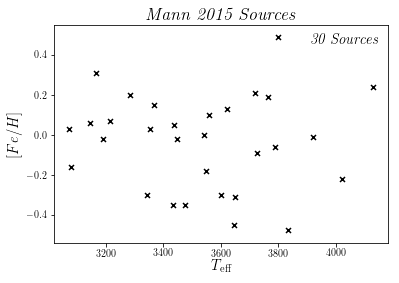

In [3]:
rfile = 'train_ref/mann_ref_labels.csv'  
tr_label = ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H', 'SNR'])

plt.figure(figsize=[6,4])
plt.scatter(tr_label.T[0], tr_label.T[1], marker='x', s=25, color='k')
# plt.scatter(tr_label.T[0], tr_label.T[1], marker='x', s=25, c=tr_label.T[2], cmap='viridis')
plt.text(4150,.46, r'$\textit{30 Sources}$', ha='right', fontsize=15)
plt.xlabel(r'$T_{\rm eff}$', fontsize=15)
plt.ylabel(r'$[Fe/H]$', fontsize=15)
plt.title(r'\textit{Mann 2015 Sources}', fontsize=18)
# plt.colorbar()
plt.show()
plt.close()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13,5])
# ax1.hist(tr_label.T[0], fill=False)
# # ax1.text(4150,4.85, r'\textit{30 Sources}', ha='right', fontsize=15)
# ax1.set_xlabel(r'$T_{\rm eff}$', fontsize=15)
# ax1.set_ylabel(r'$N \, Sources$', fontsize=15)

# ax2.hist(tr_label.T[1], fill=False)
# ax2.text(.51,5.81, r'$\textit{30 Sources}$', ha='right', fontsize=15)
# ax2.set_xlabel(r'$[Fe/H]$', fontsize=15)
# plt.show()

In [1]:
rfile = 'train_ref/west_ref_labels.csv'  
tr_label = ap.loadLabels(rfile, lbl_names=['SPT'])

plt.figure(figsize=[6,4])
plt.hist(tr_label.T[0], fill=False)
plt.text(9.2,11.6, r'\textit{51 Sources}', ha='right', fontsize=15)
plt.xlabel(r'$SPT$', fontsize=15)
plt.ylabel(r'$N \, Sources$', fontsize=15)
plt.title(r'\textit{West 2011 Sources}', fontsize=18)
plt.show()

NameError: name 'ap' is not defined

In [62]:
df = pd.read_csv('bonus_sample_results.csv')
df[0:30]

,Unnamed: 0,ID,SAMPLE,TRAIN_TEFF,TEST_TEFF,CROSS_TEFF,TEST_TEFF_ERR,CROSS_TEFF_ERR,TEST_CROSS_DIFF_TEFF,TRAIN_FEH,TEST_FEH,CROSS_FEH,TEST_FEH_ERR,CROSS_FEH_ERR,TEST_CROSS_DIFF_FEH
0,0,2M00182256+4401222,old,3603.0,3554.273625,3542.250786,-48.726375,-60.749214,12.022839,-0.30,-0.287248,-0.256381,-48.726375,-60.749214,-0.030866
1,1,2M02001278+1303112,old,3080.0,3061.939746,3056.624068,-18.060254,-23.375932,5.315677,-0.16,-0.088957,0.141444,-18.060254,-23.375932,-0.230401
2,2,2M03553688+5214291,old,3435.0,3403.638883,3389.425532,-31.361117,-45.574468,14.213351,-0.35,-0.308704,-0.207248,-31.361117,-45.574468,-0.101456
3,3,2M05312734-0340356,old,3801.0,3762.301115,3779.034100,-38.698885,-21.965900,-16.732985,0.49,0.473805,0.403396,-38.698885,-21.965900,0.070408
4,4,2M05413073+5329239,old,3765.0,3766.234585,3767.613268,1.234585,2.613268,-1.378683,0.19,0.122296,0.109522,1.234585,2.613268,0.012774
5,5,2M06000351+0242236,old,3214.0,3145.871764,3147.951395,-68.128236,-66.048605,-2.079630,0.07,0.105909,0.097537,-68.128236,-66.048605,0.008372
6,6,2M06544902+3316058,old,3448.0,3373.264152,3366.704996,-74.735848,-81.295004,6.559157,-0.02,0.015869,0.025733,-74.735848,-81.295004,-0.009865
7,7,2M08103429-1348514,old,3544.0,3548.244581,3551.030232,4.244581,7.030232,-2.785651,-0.00,-0.054881,-0.065732,4.244581,7.030232,0.010850
8,8,2M08524084+2818589,old,3166.0,3080.781425,3175.948425,-85.218575,9.948425,-95.167000,0.31,0.536612,0.306900,-85.218575,9.948425,0.229712
9,9,2M09142298+5241125,old,3920.0,3901.803802,3883.327830,-18.196198,-36.672170,18.475972,-0.01,0.010357,0.039356,-18.196198,-36.672170,-0.029000


In [ ]:
df[30:80]

In [252]:
np.array(xmatch.keys())

array(['BPmag', 'Bmag', 'CNS3', 'DEdeg', 'Fbol', 'Gaiamag', 'Hmag',
       'Icmag', 'Jmag', 'Ksmag', 'M', 'ModAge', 'ModFbol', 'ModM', 'ModR',
       'ModTeff', 'Name', 'R', 'RAdeg', 'RPmag', 'Rcmag', 'SpType',
       'Teff_1', 'Vmag', '[Fe/H]', 'chisq', 'e_BPmag', 'e_Bmag', 'e_Fbol',
       'e_Gaiamag', 'e_Hmag', 'e_Icmag', 'e_Jmag', 'e_Ksmag', 'e_M',
       'e_ModAge', 'e_ModFbol', 'e_ModM', 'e_ModR', 'e_ModTeff', 'e_R',
       'e_RPmag', 'e_Rcmag', 'e_Teff', 'e_Vmag', 'e_[Fe/H]', 'e_gmag',
       'e_imag', 'e_rmag', 'e_zmag', 'gmag', 'imag', 'rmag', 'zmag',
       'APSTAR_ID', 'TARGET_ID', 'ASPCAP_ID', 'FILE', 'APOGEE_ID',
       'TELESCOPE', 'LOCATION_ID', 'FIELD', 'J', 'J_ERR', 'H', 'H_ERR',
       'K', 'K_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'APOGEE_TARGET1',
       'APOGEE_TARGET2', 'APOGEE_TARGET3', 'TARGFLAGS', 'SURVEY', 'NINST',
       'NVISITS', 'COMBTYPE', 'COMMISS', 'SNR', 'STARFLAG', 'STARFLAGS',
       'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR',
       'VERR_M

In [235]:
gilhool = ascii.read('http://iopscience.iop.org/1538-3881/155/1/38/suppdata/ajaa9c7ct4_mrt.txt')

In [237]:
dic = {key:gilhool[key] for key in gilhool.keys()}
df = pd.DataFrame(data=dic)
df.to_csv('data_files/gilhool_2017_sources_raw.csv', index=False)

In [245]:
gil_ids = set(['2M'+x.strip('J') for x in gilhool['ID']])
len(gil_ids & set(ids_full))

20

In [231]:
file = ascii.read('data_files/mann_2015_sources_raw.txt')
dic = {key:file[key] for key in file.keys()}
df = pd.DataFrame(data=dic)
df.to_csv('data_files/mann_2015_sources_raw.csv', index=False)

xmatch = pd.read_csv('data_files/mann_2015_x_apogee.csv')
bonus = pd.read_csv('data_files/mann_bonus_xmatch.csv')

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


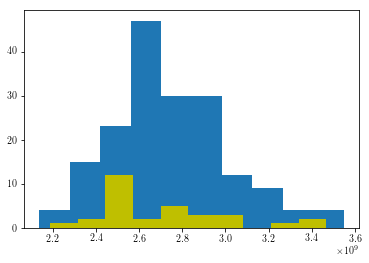

In [106]:
ages = 10**np.array(df['ModAge'])
s_ages = 10**np.array(xmatch['ModAge'])

plt.hist(ages[ages > 0])
plt.hist(s_ages[s_ages > 0], color='y')
plt.show()

1
12


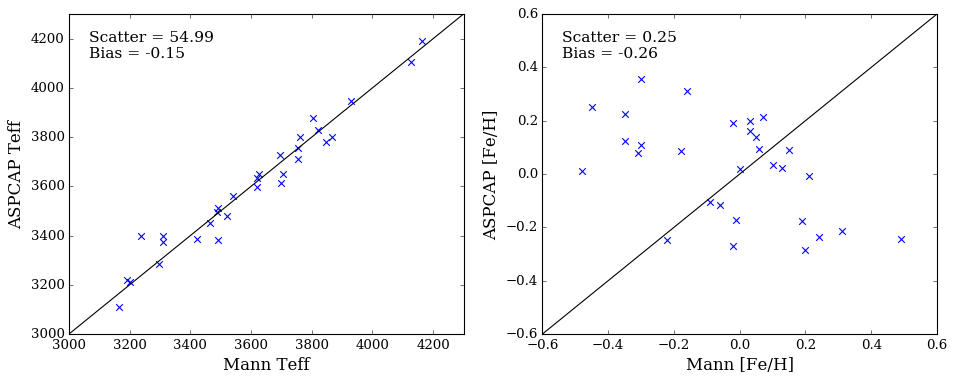

In [217]:
fparam1 = [par.split('(')[1].split(',') for par in xmatch['FPARAM']]
fparam2 = [par.split('(')[1].split(',') for par in bonus['FPARAM']]

fparam_teff1 = np.array([float(par[0]) for par in fparam1])
fparam_teff2 = np.array([float(par[0]) for par in fparam2])

fparam_fe_h1 = np.array([float(par[2]) for par in fparam1])
fparam_fe_h2 = np.array([float(par[2]) for par in fparam2])

line = np.arange(-10,5000,100)

scat1 = round(np.std(xmatch['ModTeff'][fparam_teff1 > 0] - fparam_teff1[fparam_teff1 > 0]), 2)
bias1 = round(np.mean(xmatch['ModTeff'][fparam_teff1 > 0] - fparam_teff1[fparam_teff1 > 0]), 2)
text1 = 'Scatter = %s \nBias = %s'%(scat1, bias1)

scat2 = round(np.std(xmatch['[Fe/H]'][fparam_fe_h1 > 0] - fparam_fe_h1[fparam_fe_h1 > 0]), 2)
bias2 = round(np.mean(xmatch['[Fe/H]'][fparam_fe_h1 > 0] - fparam_fe_h1[fparam_fe_h1 > 0]), 2)
text2 = 'Scatter = %s \nBias = %s'%(scat2, bias2)

print(len(xmatch['ModTeff'][fparam_teff1 < 0]))
print(len(xmatch['[Fe/H]'][fparam_fe_h1 < 0]))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])

ax1.scatter(xmatch['ModTeff'], fparam_teff1, marker='x', s=35)
ax1.plot(line, line, color='k', linewidth=1)
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
ax1.set_ylim([3000,4300])
ax1.set_xlim([3000,4300])
ax1.set_xlabel('Mann Teff', fontsize=15)
ax1.set_ylabel('ASPCAP Teff', fontsize=15)

ax2.scatter(xmatch['[Fe/H]'], fparam_fe_h1, marker='x', s=35)
ax2.plot(line, line, color='k', linewidth=1)
ax2.text(0.05, 0.95, text2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
ax2.set_ylim([-.6,.6])
ax2.set_xlim([-.6,.6])
ax2.set_xlabel('Mann [Fe/H]', fontsize=15)
ax2.set_ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.show()

1
35


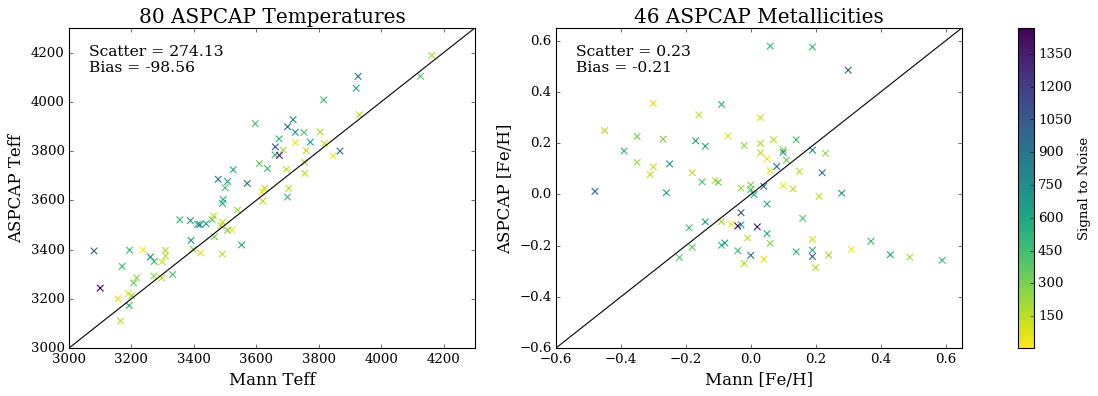

In [242]:
ids_full = [*xmatch['APOGEE_ID'], *bonus['APOGEE_ID']]
snr_full = [*xmatch['SNR'], *bonus['SNR']]
mann_teff_full = np.array([*xmatch['ModTeff'], *bonus['TEFF_1']])
mann_fe_h_full = np.array([*xmatch['[Fe/H]'], *bonus['FE_H_1']])

fparam_teff_full = np.array([*fparam_teff1, *fparam_teff2])
fparam_fe_h_full = np.array([*fparam_fe_h1, *fparam_fe_h2])

scatf1 = round(np.std(mann_teff_full[fparam_teff_full > 0] - fparam_teff_full[fparam_teff_full > 0]), 2)
biasf1 = round(np.mean(mann_teff_full[fparam_teff_full > 0] - fparam_teff_full[fparam_teff_full > 0]), 2)
textf1 = 'Scatter = %s \nBias = %s'%(scatf1, biasf1)

scatf2 = round(np.std(mann_fe_h_full[fparam_fe_h_full > 0] - fparam_fe_h_full[fparam_fe_h_full > 0]), 2)
biasf2 = round(np.mean(mann_fe_h_full[fparam_fe_h_full > 0] - fparam_fe_h_full[fparam_fe_h_full > 0]), 2)
textf2 = 'Scatter = %s \nBias = %s'%(scatf2, biasf2)

print(len(mann_teff_full[fparam_teff_full < 0]))
print(len(mann_fe_h_full[fparam_fe_h_full < 0]))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[18,5])

pl = ax1.scatter(mann_teff_full, fparam_teff_full, marker='x', s=35, c=snr_full, cmap='viridis_r')
ax1.plot(line, line, color='k', linewidth=1)
ax1.text(0.05, 0.95, textf1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
ax1.set_ylim([3000,4300])
ax1.set_xlim([3000,4300])
ax1.set_xlabel('Mann Teff', fontsize=15)
ax1.set_ylabel('ASPCAP Teff', fontsize=15)
ax1.set_title('{} ASPCAP Temperatures'.format(len(fparam_teff_full[fparam_teff_full > 0])), fontsize=18)

ax2.scatter(mann_fe_h_full, fparam_fe_h_full, marker='x', s=35, c=snr_full, cmap='viridis_r')
ax2.plot(line, line, color='k', linewidth=1)
ax2.text(0.05, 0.95, textf2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
rmin, rmax = -.6, .65
ax2.set_ylim([rmin, rmax])
ax2.set_xlim([rmin, rmax])
ax2.set_xlabel('Mann [Fe/H]', fontsize=15)
ax2.set_ylabel('ASPCAP [Fe/H]', fontsize=15)
ax2.set_title('{} ASPCAP Metallicities'.format(len(fparam_fe_h_full[fparam_fe_h_full > 0])), fontsize=18)

cb = plt.colorbar(pl, ax=(ax1,ax2), orientation='vertical')
cb.set_label('Signal to Noise', fontsize=12)
plt.show()

In [225]:
rfile = 'train_ref/bonus_ref_labels.csv'
pd.read_csv(rfile)

,ID,SAMPLE,TEFF,FEH
0,2M00182256+4401222,old,3603,-0.30
1,2M02001278+1303112,old,3080,-0.16
2,2M03553688+5214291,old,3435,-0.35
3,2M05312734-0340356,old,3801,0.49
4,2M05413073+5329239,old,3765,0.19
5,2M06000351+0242236,old,3214,0.07
6,2M06544902+3316058,old,3448,-0.02
7,2M08103429-1348514,old,3544,0.00
8,2M08524084+2818589,old,3166,0.31
9,2M09142298+5241125,old,3920,-0.01
